# LSTM from scratch

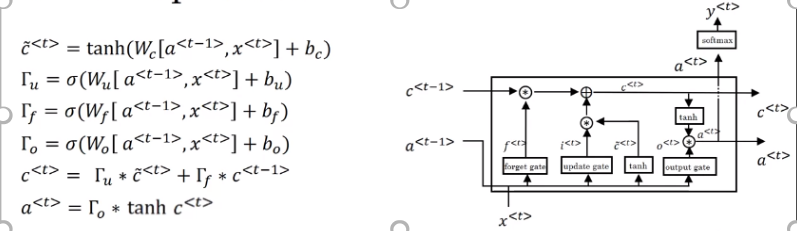

References
1.  https://github.com/amanchadha/coursera-deep-learning-specialization/blob/master/C5%20-%20Sequence%20Models/Week%201/Building%20a%20Recurrent%20Neural%20Network%20-%20Step%20by%20Step/Building_a_Recurrent_Neural_Network_Step_by_Step.ipynb

2. https://aibyhand.substack.com/p/26-lstm

3. https://youtu.be/YCzL96nL7j0?si=eRVu11uDGW_4RlsU

In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

Weights Initialization steps

Note: The gates dimension should make the long and short term memory shapes

**Pending: Figure out the logic behind the dimenesions of the matrix**

In [2]:
import numpy as np

np.random.seed(1)
# inputs
xt = np.random.randn(3, 10)

# long and short term memory
a_prev = np.random.randn(5, 10)
c_prev = np.random.randn(5, 10)

# forget gate
Wf = np.random.randn(5, 5 + 3)
bf = np.random.randn(5, 1)

# input gate
Wi = np.random.randn(5, 5 + 3)
bi = np.random.randn(5, 1)

# output gate
Wo = np.random.randn(5, 5 + 3)
bo = np.random.randn(5, 1)

# weights for long-term memory tanh function
Wc = np.random.randn(5, 5 + 3)
bc = np.random.randn(5, 1)

# weights for y computed from short-term memory
Wy = np.random.randn(2, 5)
by = np.random.randn(2, 1)

Forward propagation

In [3]:
# Concatenate a_prev and xt
concat = np.concatenate([a_prev,xt])

ft = sigmoid(np.dot(Wf,concat) + bf) # Forget Gate
it = sigmoid(np.dot(Wi,concat) + bi) # Update Gate
cct = np.tanh(np.dot(Wc,concat) + bc) # Candidate Value
c_next = c_prev*ft + cct*it # C_t

ot = sigmoid(np.dot(Wo,concat) + bo) # output gate
a_next = ot*(np.tanh(c_next)) #a_t

# Compute prediction of the LSTM cell (≈1 line)
yt_pred = softmax(np.dot(Wy,a_next) + by)
yt_pred.shape

(2, 10)